In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
import warnings
warnings.filterwarnings('ignore')

In [5]:
book=pd.read_csv(r'C:\\Users\Shiva\Desktop\ExcelR assignments\Recomondation system\book (1).csv',encoding='unicode escape')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [6]:
book=book.iloc[:,1:]
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [7]:
book.duplicated().any()

True

In [8]:
book=book.drop_duplicates()
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [9]:
book.duplicated().any()

False

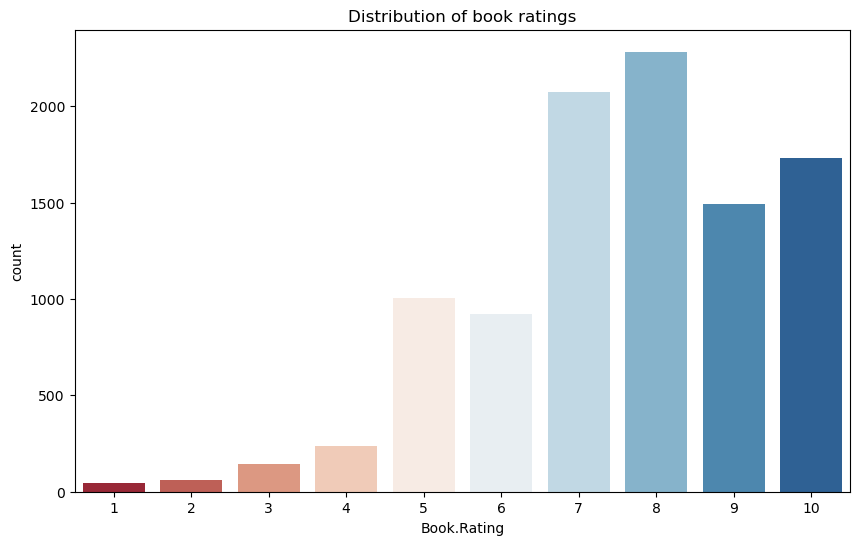

In [47]:
palette = sns.color_palette("RdBu", 10)
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Book.Rating', data=book, palette=palette)
ax.set_title('Distribution of book ratings')

plt.show()

In [10]:
book['Book.Title'].value_counts()

Fahrenheit 451                                              5
Stardust                                                    4
The Amber Spyglass (His Dark Materials, Book 3)             4
Ender's Game (Ender Wiggins Saga (Paperback))               4
The Subtle Knife (His Dark Materials, Book 2)               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

In [11]:
book['Book.Title'].value_counts()[book['Book.Title'].value_counts()>1]

Fahrenheit 451                                     5
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Ender's Game (Ender Wiggins Saga (Paperback))      4
The Subtle Knife (His Dark Materials, Book 2)      4
                                                  ..
The Flanders Panel                                 2
The Brethren                                       2
Ubik                                               2
The Silmarillion                                   2
Running from Safety: An Adventure of the Spirit    2
Name: Book.Title, Length: 303, dtype: int64

In [12]:
##no of books
##no of users

In [13]:
len(book['Book.Title'].unique())

9659

In [14]:
len(book['User.ID'].unique())

2182

In [15]:
### Checking for users who have submitted reviews more than once for the same book

In [16]:
book[book.iloc[:,0:2].duplicated()]

,User.ID,Book.Title,Book.Rating
2001,278418,White Oleander : A Novel,5
3792,1211,Black House,9
4745,2033,The First Time,2
5219,2276,In the Beauty of the Lilies,10
9945,162052,Rose,8


In [17]:
a=book[book.iloc[:,0:2].duplicated()].index

In [18]:
### taking their max rating and deleting the rest

In [19]:
for i in a:
    print(book[(book["User.ID"]==book["User.ID"][i]) & (book["Book.Title"]==book["Book.Title"][i])])
    book[(book["User.ID"]==book["User.ID"][i]) & (book["Book.Title"]==book["Book.Title"][i])]['Book.Rating'][0]=book[(book["User.ID"]==book["User.ID"][i]) & (book["Book.Title"]==book["Book.Title"][i])]['Book.Rating'].max()
    book.drop(book[(book["User.ID"]==book["User.ID"][i]) & (book["Book.Title"]==book["Book.Title"][i])].index[1:],axis=0,inplace=True)

      User.ID                Book.Title  Book.Rating
1975   278418  White Oleander : A Novel           10
2001   278418  White Oleander : A Novel            5
      User.ID   Book.Title  Book.Rating
3786     1211  Black House            8
3792     1211  Black House            9
      User.ID      Book.Title  Book.Rating
4730     2033  The First Time            7
4745     2033  The First Time            2
      User.ID                   Book.Title  Book.Rating
5218     2276  In the Beauty of the Lilies            9
5219     2276  In the Beauty of the Lilies           10
      User.ID Book.Title  Book.Rating
9778   162052       Rose            4
9945   162052       Rose            8


In [20]:
book[book['User.ID']==276875]

,User.ID,Book.Title,Book.Rating
165,276875,Pen Pals,7
166,276875,Bridget Jones's Diary,8
167,276875,Pride and Prejudice (Dover Thrift Editions),8
168,276875,EYE ON CRIME: HARDY BOYS #153,6
169,276875,Skin And Bones,7
170,276875,LAW OF THE JUNGLE (HARDY BOYS CASE FILE 105) :...,7
171,276875,The Cat Who Came to Breakfast (Cat Who... (Har...,6
172,276875,"If Singleness Is a Gift, What's the Return Pol...",6
173,276875,Always Daddy's Girl: Understanding Your Father...,8
174,276875,Night Mare (Xanth Novels (Paperback)),4


In [21]:
#Making the pivot table

In [22]:
book_df=book.pivot(index='User.ID',columns='Book.Title',values='Book.Rating')

In [23]:
book_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [24]:
book['User.ID'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [25]:
book_df.iloc[:,10].value_counts()
book_df.loc[276875,'Fahrenheit 451']

2.0

In [26]:
##Replacing na values with 0

In [27]:
book_df.fillna(0, inplace=True)
book_df
book_df.loc[276875,'Fahrenheit 451']

2.0

In [28]:
### Finding pairwise_distances

In [29]:
book_sim = 1 - pairwise_distances(book_df.values,metric='cosine')
book_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
book_sim_df = pd.DataFrame(book_sim)
book_sim_df.index = book_df.index
book_sim_df.columns = book_df.index
book_sim_df

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
book_sim_df.loc[276875,278633]

0.009260693350593763

In [32]:
book_sim_df.iloc[0:5, 0:5]

User.ID,8,9,10,12,14
User.ID,,,,,
8,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,1.0


In [33]:
#Removing 1 from diagonals

In [34]:
np.fill_diagonal(book_sim, 0)
book_sim_df.iloc[0:5, 0:5]
book_sim_df.loc[276875,278633]

0.009260693350593763

In [35]:
#recommendations for users


In [36]:
book_sim_df.idxmax(axis=1)

User.ID
8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [37]:
book[(book['User.ID']==8) | (book['User.ID']==9)]

,User.ID,Book.Title,Book.Rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7
2406,9,The Book of Kells: Selected Plates in Full Color,6


In [38]:
book[(book['User.ID']==10) | (book['User.ID']==8)]

,User.ID,Book.Title,Book.Rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7
2407,10,SINGLE &amp; SINGLE,6


In [39]:
book[(book['User.ID']==278851) | (book['User.ID']==278202)]

,User.ID,Book.Title,Book.Rating
1706,278202,The Florabama Ladies' Auxiliary &amp; Sewing C...,3
1707,278202,Howl and Other Poems (Pocket Poets),2
1708,278202,"Frankenstein: Complete, Authoritative Text Wit...",4
1709,278202,Short Stories of Ernest Hemingway (A Scribner ...,5
1710,278202,Back When We Were Grownups : A Novel (Ballanti...,3
1711,278202,To Kill a Mockingbird,9
1712,278202,Birds Bees And Babies 1994,3
1713,278202,The Cat Who Played Brahms,10
1714,278202,Black Notice,3
1715,278202,Irish Eyes: A Nuala Anne McGrail Novel (Nuala ...,5
